In [78]:
#导入需要的程序包
import pandas  as pd
import seaborn as sb
import numpy   as np

# 设置随机种子，以确保结果可复现
np.random.seed(42)

stock_nr = 20
# 生成日期索引
date_index = pd.date_range('2024-01-01', periods=stock_nr, freq='D')

# 生成随机模拟股价数据 10行2列
x = np.arange(0, 20)  # 日期序号
# 注意这里 power中如果是负数的小数次方是没意义的
# 这里是模拟一个先增后减的股票序列
'''
loc: 分布的均值(也就是期望值), 决定了分布的中心位置。在你的例子中, 设置为0, 表示生成的正态分布的均值为0。
scale: 分布的标准差, 决定了分布的分散程度。在你的例子中, 设置为1, 表示生成的正态分布的标准差为1。
'''
close_values = np.random.normal(loc=10, scale=1, size=stock_nr)  # 正态分布的随机数据
# close_values = - 0.2 * ((x - 10) ** 4) + 2000 + np.random.uniform(10, 12, size=stock_nr)  # 模拟的曲线

open_values = close_values * np.random.uniform(0.90, 1.10, size=stock_nr)  # open在close的基础上加减10%

dfs = [None] * 2

# 创建DataFrame
dfs[0] = pd.DataFrame({
        'open': open_values, 
        'close': close_values
    },
    index=date_index, 
)

close_values = np.random.normal(loc=9, scale=2, size=stock_nr)
open_values = close_values * np.random.uniform(0.90, 1.10, size=stock_nr)
dfs[1] = pd.DataFrame({
        'open': open_values, 
        'close': close_values
    },
    index=date_index, 
)
dfs[0]

,open,close
2024-01-01,10.404490,10.496714
2024-01-02,10.424202,9.861736
2024-01-03,10.008133,10.647689
2024-01-04,11.555835,11.523030
2024-01-05,9.946348,9.765847
2024-01-06,8.880002,9.765863
2024-01-07,11.828270,11.579213
2024-01-08,10.057913,10.767435
2024-01-09,8.701468,9.530526
2024-01-10,11.489041,10.542560


                open     close
2024-01-02  0.001895 -0.060493
2024-01-03 -0.039914  0.079697
2024-01-04  0.154644  0.082210
2024-01-05 -0.139279 -0.152493
2024-01-06 -0.107210  0.000002
2024-01-07  0.332012  0.185682
2024-01-08 -0.149672 -0.070107
2024-01-09 -0.134863 -0.114875
2024-01-10  0.320357  0.106189
2024-01-11 -0.092641 -0.095421
2024-01-12 -0.029003 -0.000242
2024-01-13 -0.027721  0.074226
2024-01-14 -0.244440 -0.210433
2024-01-15  0.153842  0.023293
2024-01-16  0.086802  0.140498
2024-01-17 -0.109058 -0.047739
2024-01-18  0.240315  0.147664
2024-01-19 -0.199818 -0.118503
2024-01-20  0.126788 -0.055464


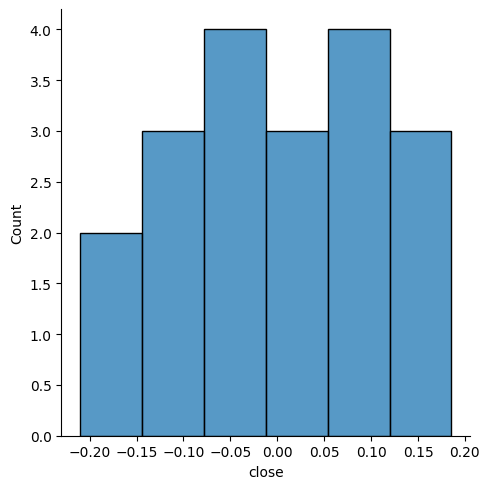

In [76]:
percentages = dfs[0].pct_change().dropna()
print(percentages)
# 绘制分布图 横坐标是涨幅 纵坐标是涨幅对应的数目
sb.displot(percentages.iloc[:,1]) # 所有行 close列

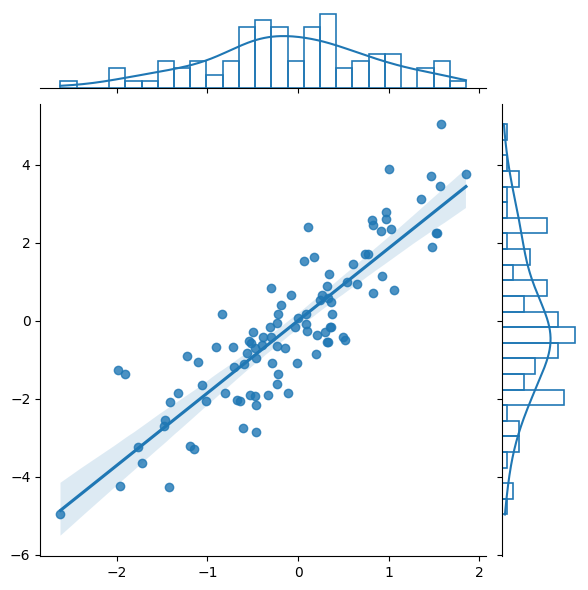

In [83]:
import matplotlib.pyplot as plt
# 生成随机数据
np.random.seed(42)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

# 使用jointplot绘制关系图
'''
'scatter'：散点图，显示两个变量之间的散点分布。
'reg'：带有拟合曲线的散点图，表示线性回归关系。
'resid'：残差图，显示线性回归的残差分布。
'kde'：核密度估计图，显示两个变量的核密度估计。
'hex'：六边形图，通过颜色深浅表示点的密度。
'hist'：直方图，分别显示两个变量的分布。
'kdeplot'：核密度估计图，与 'kde' 类似，但可以更灵活地定制。
'''
sb.jointplot(x=x, y=y, kind='reg', marginal_kws=dict(bins=25, fill=False))

# 显示图表
plt.show()